<a href="https://colab.research.google.com/github/Tousiath/Datascience/blob/main/mini_project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#________UNDERSTAND THE DATA_________

import pandas as pd
import numpy as np

#DATASET USED
df = pd.read_csv("https://raw.githubusercontent.com/chandanverma07/DataSets/master/Admission_Predict_Ver1.1.csv")

#_____GETTING INSIGHTS ABOUT THE DATA_____

df.head()



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [ ]:
df.shape

(500, 9)

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
#_____HANDLING MISSING VALUES_____



df.isnull().sum()


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

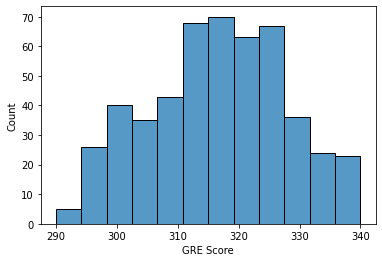

In [ ]:
#_____DATA VISUALIZATION_____


#HISTOGRAM
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(x='GRE Score', data=df, )
plt.show()


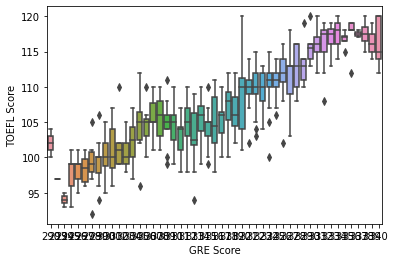

In [ ]:
#BOXPLOT
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot( x="GRE Score", y='TOEFL Score', data=df, )
plt.show()


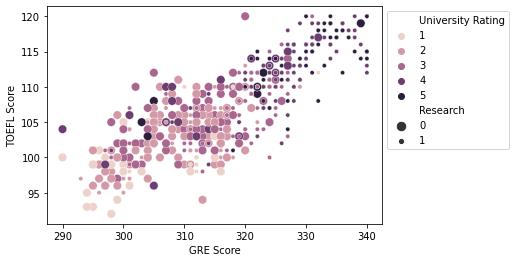

In [ ]:
#SCATTER PLOT
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot( x="GRE Score", y='TOEFL Score', data=df,
				hue='University Rating', size='Research')


plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()


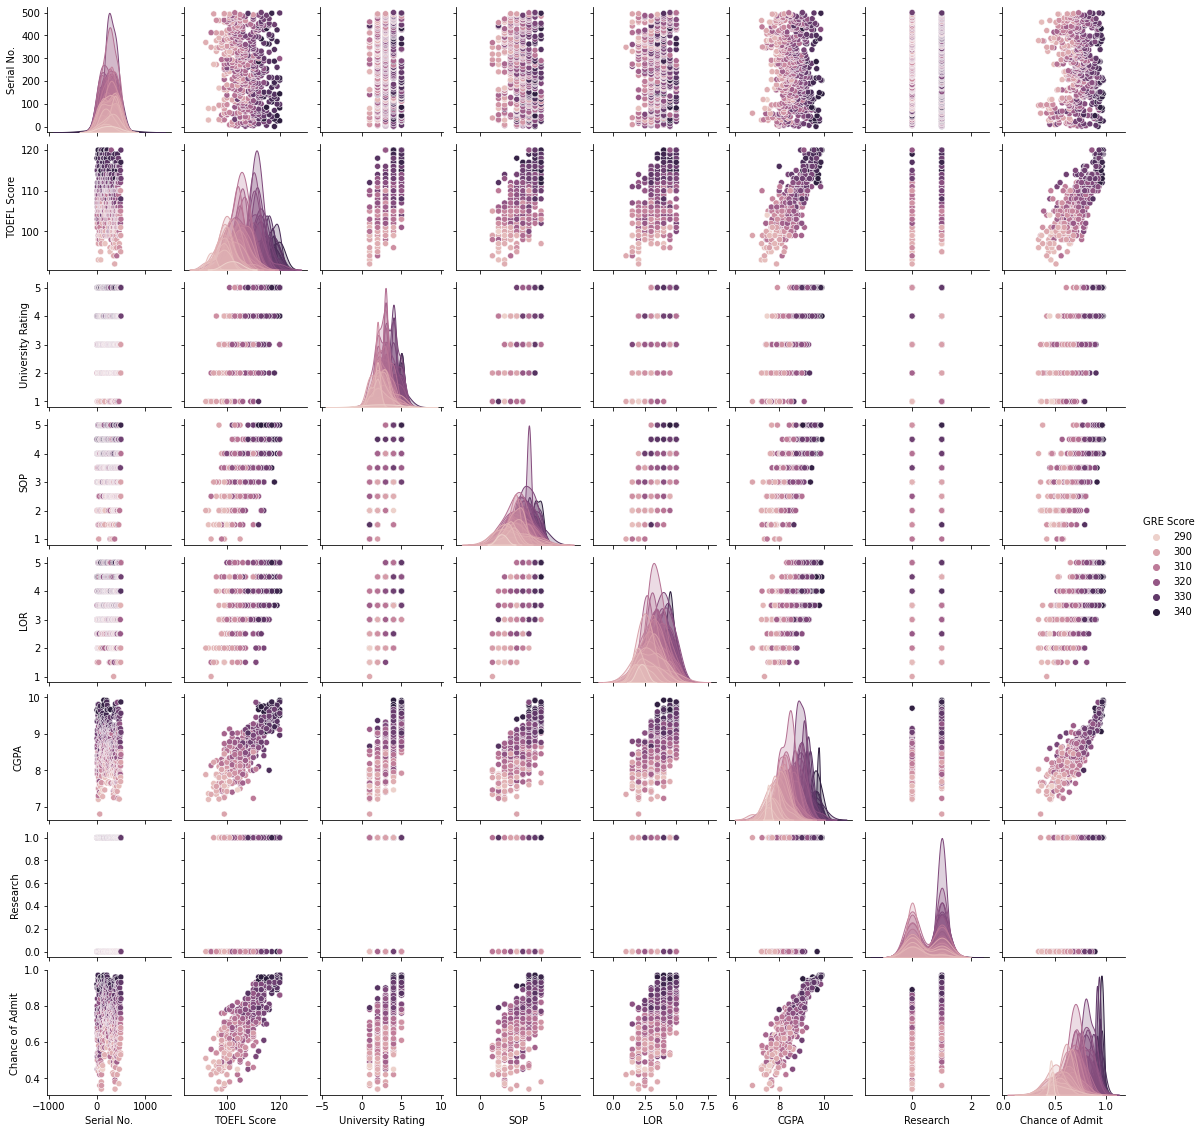

In [ ]:
#PARIPLOT()
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(df, hue='GRE Score', height=2)


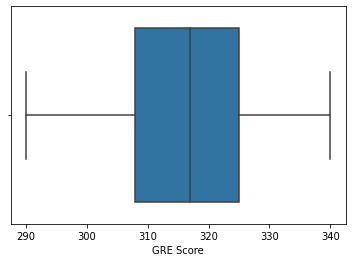

In [ ]:
#_____HANDLING OUTLIERS_____



import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/chandanverma07/DataSets/master/Admission_Predict_Ver1.1.csv')

sns.boxplot(x='GRE Score', data=df)


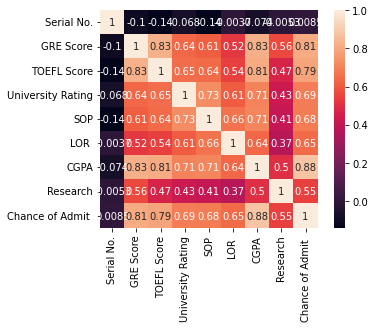

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()


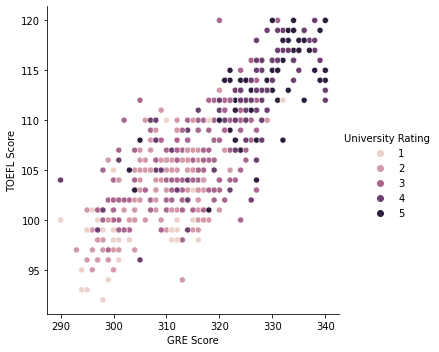

In [ ]:
sns.relplot(x='GRE Score', y='TOEFL Score', hue='University Rating', data=df)

Old Shape:  (500, 9)
New Shape:  (500, 9)


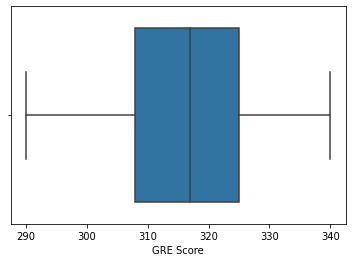

In [ ]:
#_____REMOVING OUTLIERS_____


# Importing
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/chandanverma07/DataSets/master/Admission_Predict_Ver1.1.csv')

# IQR
Q1 = np.percentile(df['GRE Score'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['GRE Score'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['GRE Score'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(df['GRE Score'] <= (Q1-1.5*IQR))

# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

sns.boxplot(x='GRE Score', data=df)
